# Consensus Analysis Illumina ground truth sites (Illumina data)

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pysam
import logomaker
from tqdm import tqdm

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

from C_to_U_classifier_plus_min.utils import create_sequence_logo, get_rev_compl

In [2]:
def produce_consensus(df, title, interval, ref_filepath):
    with tqdm(total=df.shape[0]) as pbar:
        refs = []
        ref = pysam.FastaFile(ref_filepath)
        for site in df.itertuples():
            region = site[1]
            pos1based = site[2]
            pos0based = pos1based-1
            strand = site[3]
            reference = ref.fetch(region, pos0based-interval, pos0based+interval+1)
            if strand == "+":
                refs.append(list(reference))
            elif strand == "-":
                reference = get_rev_compl(reference)
                refs.append(list(reference))
            pbar.update(1)
    ref.close()
    
    refs = pd.DataFrame(refs, columns=[f"{i}" for i in range(interval*2+1)])
    refs_freqs = {}
    for rel_pos in refs:
        refs_freqs[int(rel_pos)] = refs[rel_pos].value_counts().sort_index()
    refs = pd.DataFrame(refs_freqs).fillna(0)
    depths = refs.sum().tolist()
    refs = refs / depths
    refs = refs.T

    create_sequence_logo(refs, title=f"{title}")

In [3]:
# define inputs
ref_mm39_filepath = "/lustre/bio_running/C_to_U_editing/refs/GRCm39.primary_assembly.genome.fa"
illumina_groud_truth_sites_filepath = "/lustre/bio_running/C_to_U_editing/merged_mm39.txt"

In [4]:
illumina_groud_truth_sites = pd.read_table(illumina_groud_truth_sites_filepath, header=None)
illumina_groud_truth_sites.columns = [i.rstrip() for i in open("/lustre/bio_running/C_to_U_editing/merged_mm39_columns.txt").readlines()]
illumina_groud_truth_sites

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915683,chr1,4845460,C,1,290,35.40,"[0, 258, 0, 32]",CT,0.11,184,35.08,"[0, 184, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,chr1,4845471,C,1,290,35.45,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915851,chr1,4845628,C,1,142,35.19,"[0, 135, 0, 7]",CT,0.05,83,35.00,"[0, 83, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,chr1,4846161,C,1,183,35.79,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4967044,chr1,4896821,C,1,439,35.51,"[0, 404, 0, 35]",CT,0.08,325,35.56,"[0, 325, 0, 0]",-,0.0,UTR3,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,chrX,167346485,C,0,125,35.35,"[0, 119, 0, 6]",CT,0.05,86,35.72,"[0, 86, 0, 0]",-,0.0,UTR3,Prps2
683,chrX,166130959,chrX,167347963,C,0,70,35.71,"[0, 66, 0, 4]",CT,0.06,70,35.58,"[0, 70, 0, 0]",-,0.0,UTR3,Prps2
684,chrX,166131073,chrX,167348077,C,0,116,35.45,"[0, 110, 0, 6]",CT,0.05,128,35.77,"[0, 128, 0, 0]",-,0.0,UTR3,Prps2
685,chrX,166131296,chrX,167348300,C,0,133,35.46,"[0, 120, 0, 13]",CT,0.10,102,35.44,"[0, 102, 0, 0]",-,0.0,UTR3,Prps2


In [5]:
illumina_groud_truth_sites

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915683,chr1,4845460,C,1,290,35.40,"[0, 258, 0, 32]",CT,0.11,184,35.08,"[0, 184, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,chr1,4845471,C,1,290,35.45,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915851,chr1,4845628,C,1,142,35.19,"[0, 135, 0, 7]",CT,0.05,83,35.00,"[0, 83, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,chr1,4846161,C,1,183,35.79,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4967044,chr1,4896821,C,1,439,35.51,"[0, 404, 0, 35]",CT,0.08,325,35.56,"[0, 325, 0, 0]",-,0.0,UTR3,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,chrX,167346485,C,0,125,35.35,"[0, 119, 0, 6]",CT,0.05,86,35.72,"[0, 86, 0, 0]",-,0.0,UTR3,Prps2
683,chrX,166130959,chrX,167347963,C,0,70,35.71,"[0, 66, 0, 4]",CT,0.06,70,35.58,"[0, 70, 0, 0]",-,0.0,UTR3,Prps2
684,chrX,166131073,chrX,167348077,C,0,116,35.45,"[0, 110, 0, 6]",CT,0.05,128,35.77,"[0, 128, 0, 0]",-,0.0,UTR3,Prps2
685,chrX,166131296,chrX,167348300,C,0,133,35.46,"[0, 120, 0, 13]",CT,0.10,102,35.44,"[0, 102, 0, 0]",-,0.0,UTR3,Prps2


In [6]:
illumina_groud_truth_sites.SubsFreq_WT.describe()

count    687.000000
mean       0.085138
std        0.060476
min        0.050000
25%        0.050000
50%        0.060000
75%        0.090000
max        0.580000
Name: SubsFreq_WT, dtype: float64

In [7]:
illumina_groud_truth_sites.SubsFreq_KO.describe()

count    687.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: SubsFreq_KO, dtype: float64

In [8]:
illumina_groud_truth_sites.PositionAnnotation.value_counts()

UTR3              631
ncRNA_intronic     17
exonic             12
intronic            8
downstream          7
intergenic          5
ncRNA_exonic        4
UTR5                3
Name: PositionAnnotation, dtype: int64

In [9]:
for i in illumina_groud_truth_sites.gene_name.value_counts().to_frame().itertuples():
    print(i.Index, "--->", i.gene_name)

Sh3bgrl ---> 12
Lamp2 ---> 10
App ---> 8
Pls3 ---> 8
Msn ---> 8
Selenof ---> 7
Nxt2 ---> 7
Rhoq ---> 6
Atp6ap2 ---> 6
Tmem64 ---> 6
Dynlt3 ---> 5
Cmpk1 ---> 5
Anp32e ---> 5
Anxa4 ---> 5
Actr2 ---> 5
Prps2 ---> 5
Phf6 ---> 5
B2m ---> 5
Anxa5 ---> 4
Tmem30a ---> 4
Daglb;Rac1 ---> 4
Syncrip ---> 4
Gm5577 ---> 4
BC003331 ---> 4
Sppl2a ---> 4
Prkar1a ---> 4
Dek ---> 4
Acadsb ---> 4
Oxct1 ---> 4
Taf13 ---> 4
Sdcbp ---> 4
Lypla1 ---> 4
Twsg1 ---> 4
Ube3c ---> 4
Alg10b ---> 3
Sept11 ---> 3
Mtpn ---> 3
Prkacb ---> 3
Stx7 ---> 3
Magt1 ---> 3
Map3k15;Pdha1 ---> 3
Eif1ax ---> 3
Paics ---> 3
Ndfip1 ---> 3
Bcap31 ---> 3
Gm4876 ---> 3
Psip1 ---> 3
Asph ---> 3
Rtn4 ---> 3
Tmod3 ---> 3
Sptssa ---> 3
Larp4 ---> 3
Capza1 ---> 3
Sypl ---> 3
Tceal9 ---> 3
Tnpo1 ---> 3
Soat1 ---> 3
Coa5 ---> 3
Bcas2 ---> 3
Hipk1 ---> 3
Zfp706 ---> 3
Ola1 ---> 3
Tmx3 ---> 3
Rsu1 ---> 3
Slc44a1 ---> 3
Atp6v1g1 ---> 3
Srsf10 ---> 2
St13 ---> 2
Ube2j1 ---> 2
AC122463.1 ---> 2
Pclaf ---> 2
Ttc3 ---> 2
Tmed5 ---> 2
Rfk ---> 2
Sel

In [10]:
illumina_groud_truth_sites.query("gene_name == 'B2m'")

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
73,chr2,121983199,chr2,122152718,C,1,3143,35.39,"[0, 2976, 0, 167]",CT,0.05,2337,35.45,"[1, 2336, 0, 0]",CA,0.0,UTR3,B2m
74,chr2,121983221,chr2,122152740,C,1,2793,34.43,"[0, 2180, 0, 613]",CT,0.22,2211,34.06,"[0, 2210, 0, 1]",CT,0.0,UTR3,B2m
75,chr2,121983223,chr2,122152742,C,1,2719,34.68,"[0, 2565, 0, 154]",CT,0.06,2049,34.48,"[0, 2048, 0, 1]",CT,0.0,UTR3,B2m
76,chr2,121983285,chr2,122152804,C,1,1317,35.29,"[0, 1219, 0, 98]",CT,0.07,908,35.38,"[0, 908, 0, 0]",-,0.0,UTR3,B2m
77,chr2,121983383,chr2,122152902,C,1,1120,35.49,"[0, 652, 0, 468]",CT,0.42,715,35.29,"[0, 714, 0, 1]",CT,0.0,UTR3,B2m


In [11]:
illumina_groud_truth_sites = illumina_groud_truth_sites[["contig_mm39", "pos_mm39", "strand"]].copy()
illumina_groud_truth_sites.columns = ["region", "position", "strand"]
illumina_groud_truth_sites["strand"] = illumina_groud_truth_sites["strand"].apply(lambda x:"+" if x == 1 else "-")
illumina_groud_truth_sites

,region,position,strand
0,chr1,4915683,+
1,chr1,4915694,+
2,chr1,4915851,+
3,chr1,4916384,+
4,chr1,4967044,+
...,...,...,...
682,chrX,166129481,-
683,chrX,166130959,-
684,chrX,166131073,-
685,chrX,166131296,-


100%|██████████| 687/687 [00:25<00:00, 27.42it/s]
findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


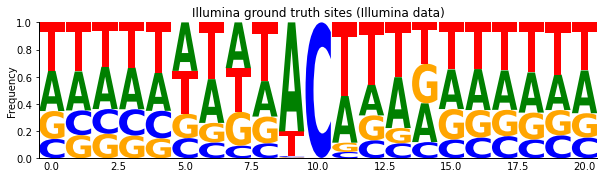

In [12]:
produce_consensus(illumina_groud_truth_sites, "Illumina ground truth sites (Illumina data)", 10, ref_mm39_filepath)

In [13]:
illumina_groud_truth_sites

,region,position,strand
0,chr1,4915683,+
1,chr1,4915694,+
2,chr1,4915851,+
3,chr1,4916384,+
4,chr1,4967044,+
...,...,...,...
682,chrX,166129481,-
683,chrX,166130959,-
684,chrX,166131073,-
685,chrX,166131296,-
